In [18]:
# add parent dir to sys.path so we can import from repo base
import os; import sys; sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from tsfresh.transformers import RelevantFeatureAugmenter

from script.dataset import get_data
from script.visualization import report_cm

In [20]:
# Parameters
leave_out = 'p1'
k_folds = 5
random_state = 42

In [21]:
# Load data
ts, y = get_data()

# Prepare the DataFrame
X = pd.DataFrame(index=y.index)
split = y.index.str.contains(leave_out)
X_train_full, X_test, y_train_full, y_test = (X[~split], X[split], y[~split], y[split])

In [22]:
# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)
best_model = None
best_score = 0

In [23]:
# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_full)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    # Split the data
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
    
    # Define pipeline
    ppl = Pipeline([
        ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])
    ppl.set_params(augmenter__timeseries_container=ts)

    # Train model
    ppl.fit(X_train, y_train)
    
    # Validate model
    y_val_pred = ppl.predict(X_val)
    val_score = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy: {val_score:.4f}')
    
    # Save the best model
    if val_score > best_score:
        best_score = val_score
        best_model = ppl


Fold 1/5


Feature Extraction: 100%|██████████| 30/30 [01:31<00:00,  3.03s/it]
c:\Users\shnag\anaconda3\envs\DS4W\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG

Validation Accuracy: 0.8298
Fold 2/5


Feature Extraction: 100%|██████████| 30/30 [01:37<00:00,  3.26s/it]
c:\Users\shnag\anaconda3\envs\DS4W\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.

Validation Accuracy: 0.8511
Fold 3/5


Feature Extraction: 100%|██████████| 30/30 [01:33<00:00,  3.11s/it]
c:\Users\shnag\anaconda3\envs\DS4W\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshol

Validation Accuracy: 0.8478
Fold 4/5


Feature Extraction: 100%|██████████| 30/30 [01:17<00:00,  2.59s/it]
c:\Users\shnag\anaconda3\envs\DS4W\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG

Validation Accuracy: 0.9348
Fold 5/5


Feature Extraction: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]
c:\Users\shnag\anaconda3\envs\DS4W\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshol

Validation Accuracy: 0.8696


Best Validation Accuracy: 0.9348


Feature Extraction: 100%|██████████| 30/30 [00:10<00:00,  2.85it/s]


# Results: p1

accuracy: 0.9375


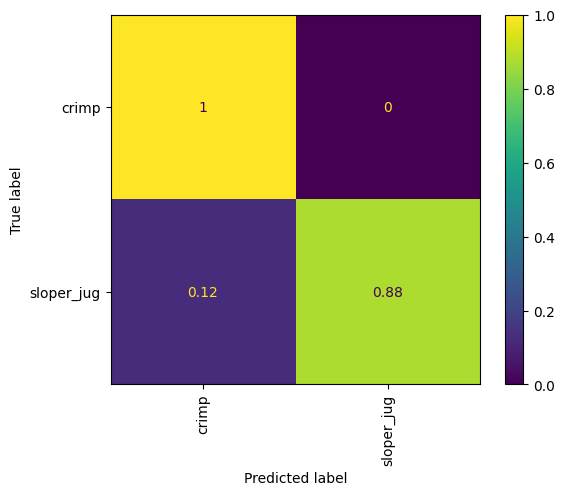

              precision    recall  f1-score   support

       crimp       0.89      1.00      0.94        40
  sloper_jug       1.00      0.88      0.93        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [24]:
# Final evaluation on the test set
print(f'Best Validation Accuracy: {best_score:.4f}')
y_test_pred = best_model.predict(X_test)
report_cm(f'Results: {leave_out}', y_test, y_test_pred, best_model.named_steps['classifier'].classes_)
print(classification_report(y_test, y_test_pred))

Feature Extraction: 100%|██████████| 30/30 [00:10<00:00,  2.86it/s]
c:\Users\shnag\anaconda3\envs\DS4W\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\shnag\anaconda3\envs\DS4W\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


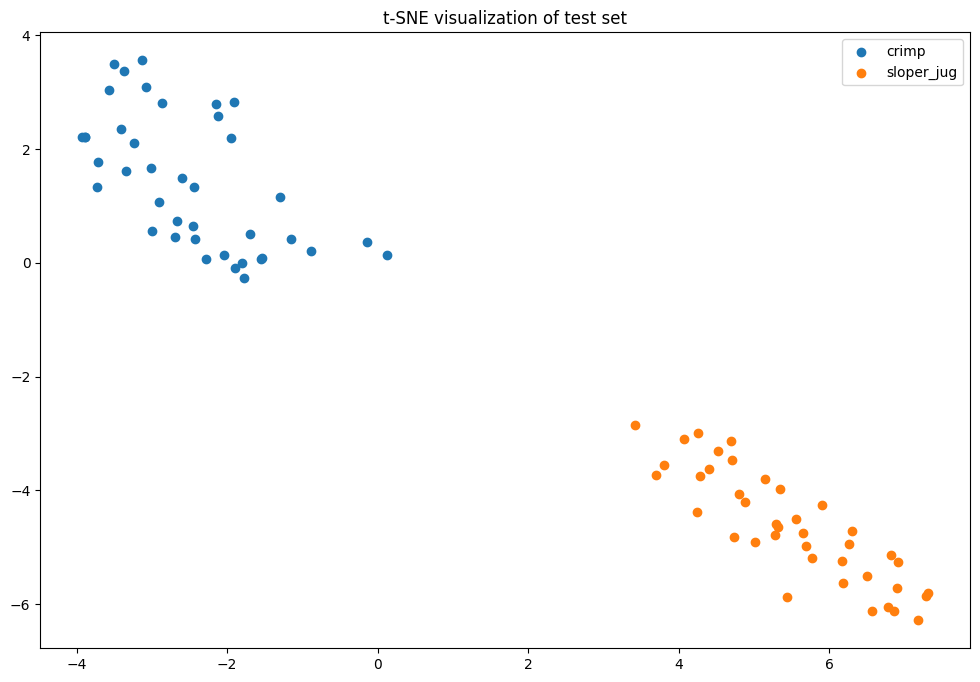

In [25]:
# Visualization with t-SNE (optional)
features = best_model.named_steps['augmenter'].transform(X_test)
X_tsne = TSNE(n_components=2, random_state=random_state).fit_transform(features)
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(best_model.named_steps['classifier'].classes_):
    plt.scatter(X_tsne[y_test == target_name, 0], X_tsne[y_test == target_name, 1], label=target_name)
plt.legend()
plt.title('t-SNE visualization of test set')
plt.show()